In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

# 3. Data Checks to perform
* Check missing values
* Check Duplicates
* Check Data type
* Check the number of unique values of each column
*  Check statistics of data set
* Check various categories present in the different categorical column

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insights or Observations

There are no missing value

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

No duplicates

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observations

* From the above description of numerical data , all means are very close to each other - between 66 and 69
* All the standard deviation are so close between 14.6 - 15.9
* While there is a minimum of 0 for maths , others are having 17 and 10 value

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
[feature for feature in df.columns if df[feature].dtype =='O']  # categorical features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [22]:
[feature for feature in df.columns if df[feature].dtype !='O'] # numerical features

['math_score', 'reading_score', 'writing_score']

In [23]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [24]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [27]:
df['total_score']= (df['math_score'] + df['reading_score'] + df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

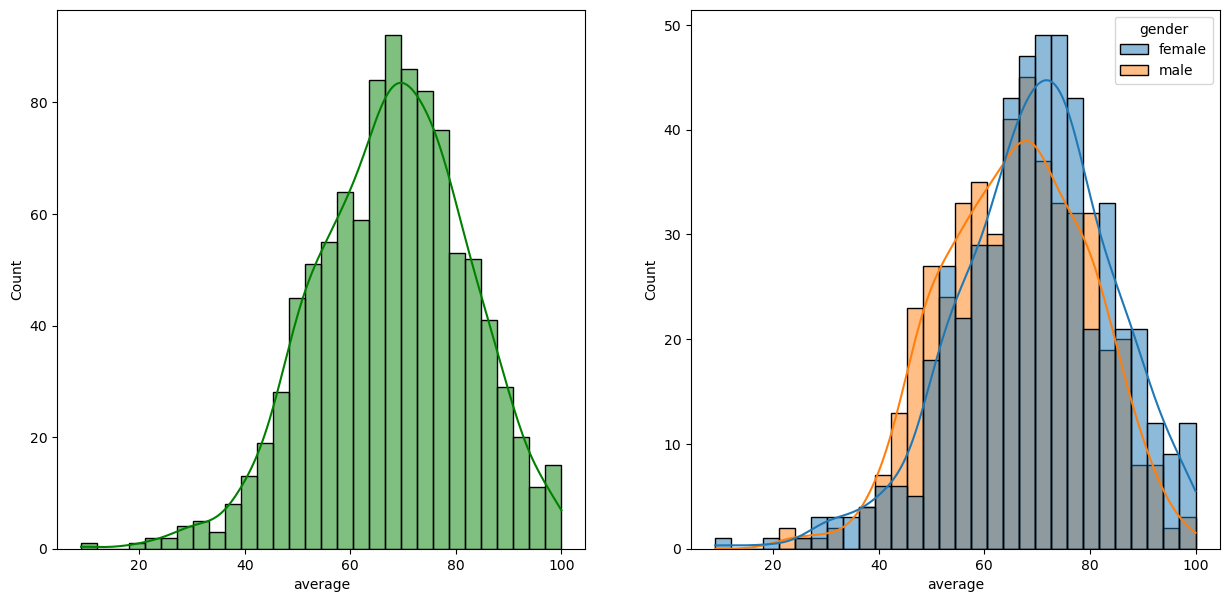

In [35]:
### Exploring more visualizations

fig,axis=plt.subplots(1,2,figsize=(15,7)) # one row two columns
plt.subplot(121) # in 1,2 1st box
sns.histplot(data=df,x='average',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
sns

## Insights
* Female students tend to perform well than male students

<Axes: xlabel='average', ylabel='Count'>

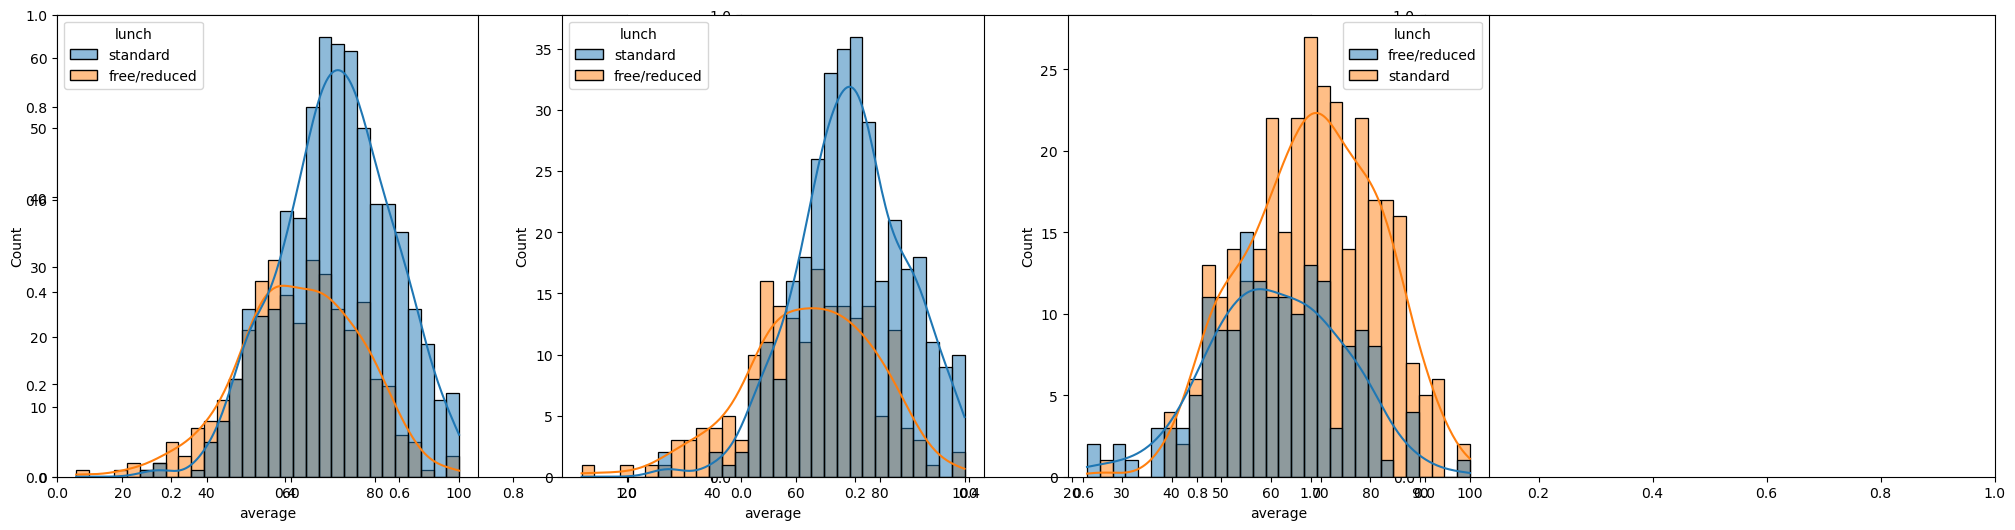

In [41]:
### Exploring more visualizations

fig,axis=plt.subplots(1,3,figsize=(25,6)) # one row two columns
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch')


In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

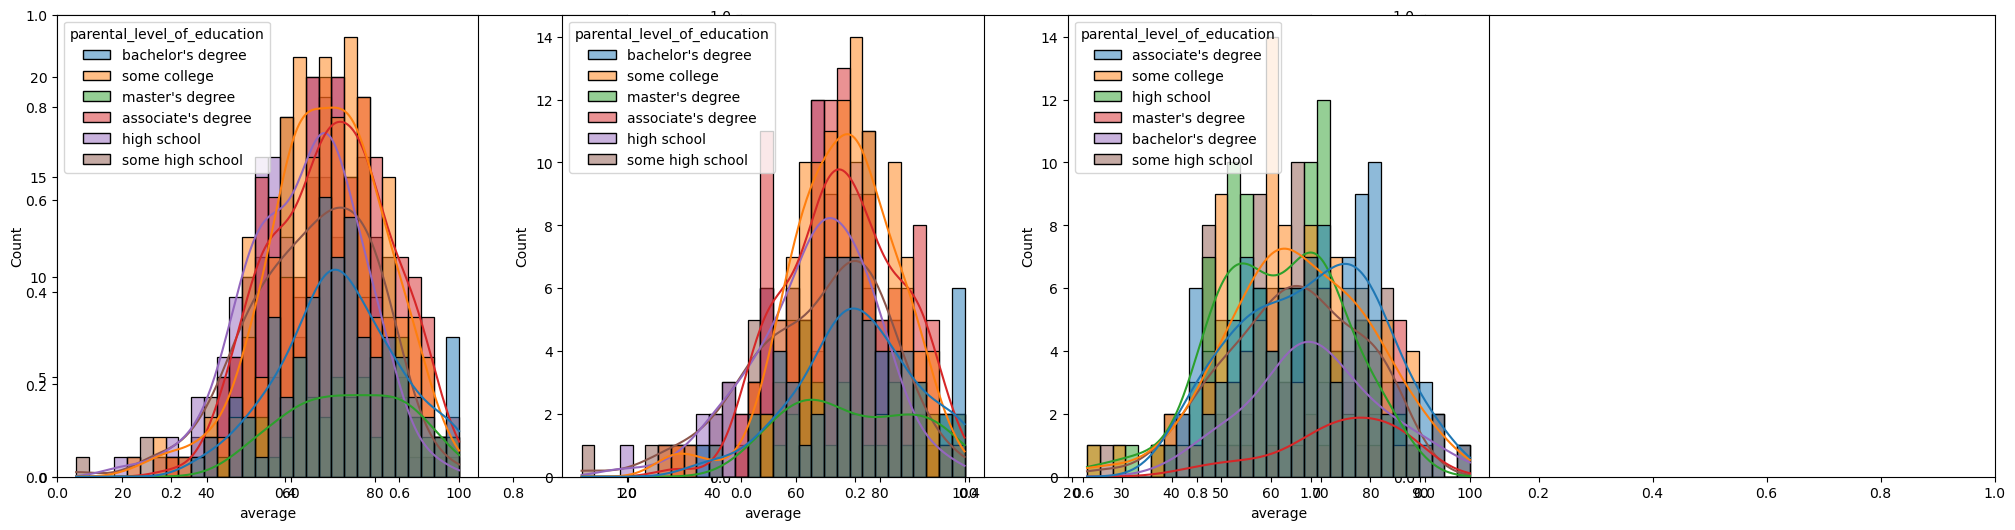

In [44]:
### Exploring more visualizations

fig,axis=plt.subplots(1,3,figsize=(25,6)) # one row two columns
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='parental_level_of_education')


# Insights
* In General parents education dont help perform well in exams.
* 3rd Plot shows that whose education is of associate's degree or master's degree their male child tend to perform well in exam.
* 2nd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

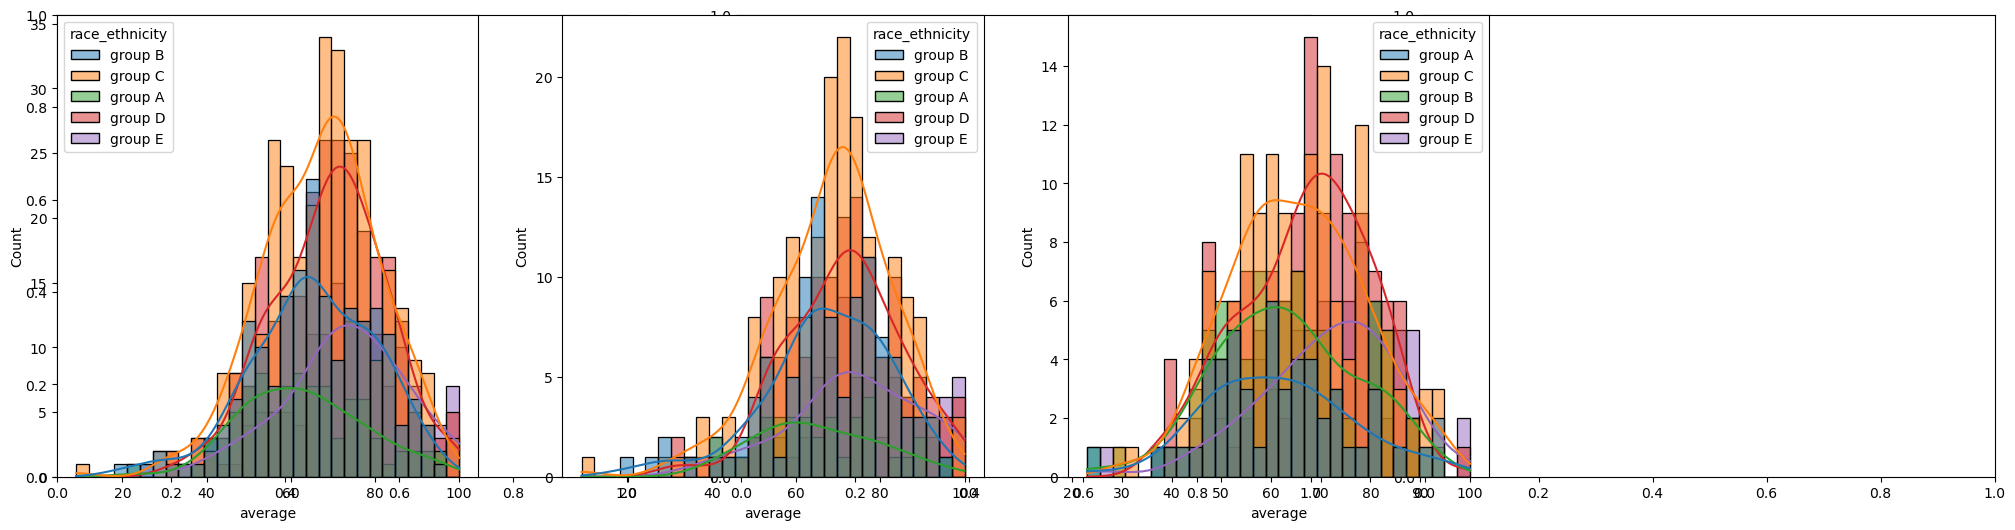

In [45]:
### Exploring more visualizations

fig,axis=plt.subplots(1,3,figsize=(25,6)) # one row two columns
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='race_ethnicity')


# Insights
* Student of group A and group B tends to perform poorly in exam.
* Student of group A and group B tends to perform poorly in exam irrespective of whethere they are male or female

They are right skewed so shows average score is decreasing

<Axes: >

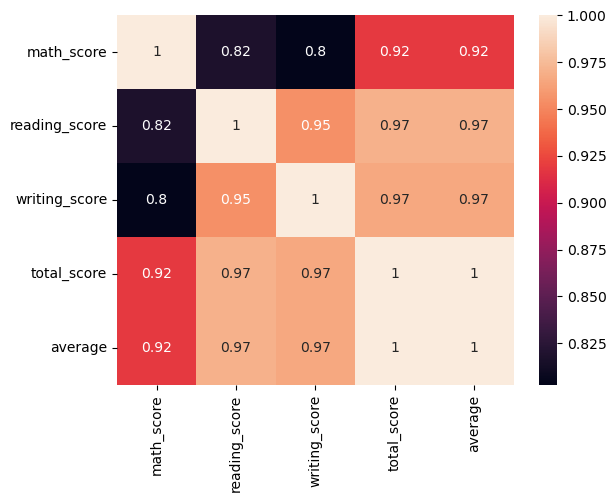

In [50]:
sns.heatmap(df[['math_score','reading_score','writing_score','total_score','average']].corr(),annot=True)

a correlation heatmap using Seaborn that shows the relationships between students' **math**, **reading**, **writing**, **total**, and **average** scores. Let me break down how to read and interpret it:

---

### 🔹 **What Is a Correlation Heatmap?**

A **correlation heatmap** visually shows how strongly related variables are to one another, using a **correlation coefficient (r)** which ranges from:

* **+1**: Perfect **positive** relationship
* **0**: **No** relationship
* **-1**: Perfect **negative** relationship

---

### 🔍 **How to Read This Specific Heatmap**

Each cell shows how much two variables are **correlated**. The closer the value is to **1**, the more **strongly positively correlated** they are.

#### Example Interpretations:

* **math\_score vs reading\_score = 0.82**

  * Students who score high in math also tend to score high in reading, though not perfectly. It’s a strong positive relationship.
* **reading\_score vs writing\_score = 0.95**

  * This is a **very strong positive** correlation. If someone scores well in reading, it's highly likely they also do well in writing.
* **math\_score vs writing\_score = 0.80**

  * Weaker than reading-writing, but still a strong positive correlation.
* **total\_score vs all three subjects = 0.92–0.97**

  * Makes sense: total\_score is the sum, so it’s naturally very highly correlated with the components.
* **average vs total\_score = 1.0**

  * This is expected: average is directly derived from total.

---

### 📘 **Insights You Can Extract:**

1. **Reading and writing scores are most strongly related (0.95).**

   * Possibly because they involve similar language comprehension skills.

2. **Math is slightly less correlated with reading and writing.**

   * Indicates students may perform differently in math compared to language-based subjects.

3. **Total and average are highly correlated with individual scores.**

   * Logical because they're calculated from them.

---

### ✅ **Practical Use Cases:**

* **Curriculum Design:** If writing and reading are so tightly linked, improvements in one likely help the other.
* **Student Intervention:** If a student is weak in both math and reading, it could affect their overall score significantly due to high correlations.
* **Predictive Modeling:** You could use reading and writing to predict total score fairly accurately due to high correlation.

---

Would you like help interpreting this heatmap in the context of a real dataset or preparing a report or presentation from it?
